## Environment Set-Up
Setting up a virtual environment is a crucial step in managing your Python project's dependencies effectively. 

###  1. Create a Virtual Environment
Run the following command to create a virtual environment in your project directory. 

Replace `.venv` with your desired name for the virtual environment folder if needed:

`python -m venv .venv`


###  2. Activate the Virtual Environment
Activate the virtual environment using the appropriate command for your operating system:
- On Linux/macOS:

    `source .venv/bin/activate`
    
- On Windows (Command Prompt)

    `.venv\Scripts\activate
`

- On Windows (PowerShell):

    `.venv\Scripts\Activate.ps1`

###  3. Upgrade `pip`
After activating the virtual environment, upgrade `pip` to ensure you have the latest version:

`pip install --upgrade pip`

###  4. Install Project Dependencies
Use `pip` to install all the required dependencies for the project as specified in the `requirements.txt` file:

`pip install -r requirements.txt`

###  5. Install Azure CLI SDK
To install the Azure CLI SDK, please visit: https://learn.microsoft.com/en-us/cli/azure/install-azure-cli

### 6. Log in to Azure
Run the following command to log in to Azure:
`az login`

## Create a project in Azure AI Foundry

1. Follow the guidelines in this article (https://learn.microsoft.com/en-us/azure/ai-studio/how-to/create-projects?tabs=ai-studio). If you don't have them already, make sure to create new AI services and AI Search resources.

   <Image src='docs/create_project_in_azure_ai_foundry.png'>


2. **Obtain the Connection String**  
   Copy the connection string from your AI Studio project. It should follow this format: `eastus.api.azureml.ms;12345678-abcd-1234-9fc6-62780b3d3e05;my-resource-group;my-project-name`

3. **Deploy gpt-4o-mini model**  
   In the `Models + Endpoints` section, deploy a gpt-4o-mini model with the deoloyment name as "gpt-4o-mini".

4. **Set Environment Variables**  
Ensure you set the required environment variables in `.env` file.

## (Optional) Create a TimeGEN endpoint

1. **Find TimeGEN model in Model Catalog**

   <Image src='docs/time_gen_1.png'>


2. **Create an endpoint**  
   
   <Image src='docs/time_gen_2.png'>

3. **Set Environment Variables**  
Save endpoint and key variables in `.env` file.

In [1]:
# load environment variables from the .env file
import os
from dotenv import load_dotenv

load_dotenv()
print(os.getenv('CHAT_MODEL'))

gpt-4o-mini-2


In [2]:
import os
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential


project_client = AIProjectClient.from_connection_string(
    credential=DefaultAzureCredential(exclude_managed_identity_credential=True), conn_str="eastus.api.azureml.ms;ccca9c39-a74a-410a-9bf4-6e5318de771e;1809024-rg2;1809024-ai"
)

connections = project_client.connections.list()
for connection in connections:
    print(connection)

{
 "name": "1809024-model_aoai",
 "id": "/subscriptions/ccca9c39-a74a-410a-9bf4-6e5318de771e/resourceGroups/1809024-rg2/providers/Microsoft.MachineLearningServices/workspaces/1809024-ai/connections/1809024-model_aoai",
 "authentication_type": "ApiKey",
 "connection_type": "ConnectionType.AZURE_OPEN_AI",
 "endpoint_url": "https://1809024-model.openai.azure.com",
 "key": null
 "token_credential": null
}

{
 "name": "1809024-model",
 "id": "/subscriptions/ccca9c39-a74a-410a-9bf4-6e5318de771e/resourceGroups/1809024-rg2/providers/Microsoft.MachineLearningServices/workspaces/1809024-ai/connections/1809024-model",
 "authentication_type": "ApiKey",
 "connection_type": "ConnectionType.AZURE_AI_SERVICES",
 "endpoint_url": "https://1809024-model.cognitiveservices.azure.com",
 "key": null
 "token_credential": null
}

{
 "name": "1809024-ai/workspaceblobstore",
 "id": "/subscriptions/ccca9c39-a74a-410a-9bf4-6e5318de771e/resourceGroups/1809024-rg2/providers/Microsoft.MachineLearningServices/workspac

In [3]:
from azure.ai.projects.models import ConnectionType

connections = project_client.connections.list(
    connection_type=ConnectionType.AZURE_OPEN_AI,
)
for connection in connections:
    print(connection)

{
 "name": "1809024-model_aoai",
 "id": "/subscriptions/ccca9c39-a74a-410a-9bf4-6e5318de771e/resourceGroups/1809024-rg2/providers/Microsoft.MachineLearningServices/workspaces/1809024-ai/connections/1809024-model_aoai",
 "authentication_type": "ApiKey",
 "connection_type": "ConnectionType.AZURE_OPEN_AI",
 "endpoint_url": "https://1809024-model.openai.azure.com",
 "key": null
 "token_credential": null
}



In [4]:
aoai_client = project_client.inference.get_azure_openai_client(
    api_version="2024-06-01")

response = aoai_client.chat.completions.create(
    model=os.environ["CHAT_MODEL"],  # Model deployment name
    messages=[
        {
            "role": "user",
            "content": "How many feet are in a mile?",
        },
    ],
)

print(response.choices[0].message.content)

There are 5,280 feet in a mile.


# List all agents

In [5]:
agent_list = project_client.agents.list_agents().data
for _agent in agent_list:
    print(_agent)

# Delete all agents

In [6]:
agent_list = project_client.agents.list_agents().data
for _agent in agent_list:
    project_client.agents.delete_agent(_agent.id)
    print(f'agent {_agent.name} deleted')

# Create Agent

In [7]:
from azure.ai.projects.models import CodeInterpreterTool


# Create an instance of the CodeInterpreterTool
code_interpreter = CodeInterpreterTool()


# The CodeInterpreterTool needs to be included in creation of the agent
agent = project_client.agents.create_agent(
    model=os.environ["CHAT_MODEL"],
    name="code_agent",
    instructions="You are helpful agent",
    tools=code_interpreter.definitions,
    tool_resources=code_interpreter.resources,
)

print(f"Created agent, agent ID: {agent.id}")

Created agent, agent ID: asst_S1xh64Ie3psqeonBacIW8LPc


In [8]:
# List all agents
agent_list = project_client.agents.list_agents().data
for _agent in agent_list:
    print(_agent)

{'id': 'asst_S1xh64Ie3psqeonBacIW8LPc', 'object': 'assistant', 'created_at': 1744179581, 'name': 'code_agent', 'description': None, 'model': 'gpt-4o-mini-2', 'instructions': 'You are helpful agent', 'tools': [{'type': 'code_interpreter'}], 'top_p': 1.0, 'temperature': 1.0, 'tool_resources': {'code_interpreter': {'file_ids': []}}, 'metadata': {}, 'response_format': 'auto'}


In [9]:
# Create a thread to hold the conversation
thread = project_client.agents.create_thread()
print(f"Created thread, thread ID: {thread.id}")

Created thread, thread ID: thread_hKpSlJTBOw3KpJNeH5TPx7l6


In [10]:
# Create a message
user_message = "Hello"
message = project_client.agents.create_message(
    thread_id=thread.id,
    role="user",
    content=user_message,
)
print(f"Created message, message ID: {message.id}, content: {message.content}")

Created message, message ID: msg_PC6BUGewiNpFcPdv3NV3jnls, content: [{'type': 'text', 'text': {'value': 'Hello', 'annotations': []}}]


In [12]:
# Run the agent
run = project_client.agents.create_and_process_run(
    thread_id=thread.id, assistant_id=agent.id)
print(f"Run finished with status: {run.status}")

if run.status == "failed":
    print(f"Run failed: {run.last_error}")

Run finished with status: RunStatus.COMPLETED


In [13]:
# Display all messages in the thread
from IPython.display import Markdown, display
import helper

messages = project_client.agents.list_messages(thread_id=thread.id)

display(Markdown(helper.get_conversation_md(messages)))

# Conversation
___
### **User** (2025-04-09 06:19:52 Coordinated Universal Time)
Hello
___
### **Assistant** (2025-04-09 06:20:18 Coordinated Universal Time)
Hello! How can I assist you today?
___

In [14]:
print(messages)

{'object': 'list', 'data': [{'id': 'msg_rkD6JRes0xjrIH4C12nGuJzN', 'object': 'thread.message', 'created_at': 1744179618, 'assistant_id': 'asst_S1xh64Ie3psqeonBacIW8LPc', 'thread_id': 'thread_hKpSlJTBOw3KpJNeH5TPx7l6', 'run_id': 'run_4r0KKf1YWU8ZufXHOMTU6MxX', 'role': 'assistant', 'content': [{'type': 'text', 'text': {'value': 'Hello! How can I assist you today?', 'annotations': []}}], 'attachments': [], 'metadata': {}}, {'id': 'msg_PC6BUGewiNpFcPdv3NV3jnls', 'object': 'thread.message', 'created_at': 1744179592, 'assistant_id': None, 'thread_id': 'thread_hKpSlJTBOw3KpJNeH5TPx7l6', 'run_id': None, 'role': 'user', 'content': [{'type': 'text', 'text': {'value': 'Hello', 'annotations': []}}], 'attachments': [], 'metadata': {}}], 'first_id': 'msg_rkD6JRes0xjrIH4C12nGuJzN', 'last_id': 'msg_PC6BUGewiNpFcPdv3NV3jnls', 'has_more': False}


In [15]:
user_message = "Could you please create a bar chart for the operating profit using the following data and provide the file to me? Company A: $1.2 million, Company B: $2.5 million, Company C: $3.0 million, Company D: $1.8 million"

In [17]:
from pathlib import Path


thread = project_client.agents.create_thread()
print(f"Created thread, thread ID: {thread.id}")

# Create a message
message = project_client.agents.create_message(
    thread_id=thread.id,
    role="user",
    content=user_message,
)
print(f"Created message, message ID: {message.id}")

# Run the agent
run = project_client.agents.create_and_process_run(
    thread_id=thread.id, assistant_id=agent.id)
print(f"Run finished with status: {run.status}")

if run.status == "failed":
    # Check if you got "Rate limit is exceeded.", then you want to get more quota
    print(f"Run failed: {run.last_error}")


messages = project_client.agents.list_messages(thread_id=thread.id)
display(Markdown(helper.get_conversation_md(messages)))

Created thread, thread ID: thread_I4KpDy2tRYH0KAH5RBLqv19Q
Created message, message ID: msg_14mw4qyR5DFiKokOdwoOrmqA
Run finished with status: RunStatus.COMPLETED


# Conversation
___
### **User** (2025-04-09 06:21:01 Coordinated Universal Time)
Could you please create a bar chart for the operating profit using the following data and provide the file to me? Company A: $1.2 million, Company B: $2.5 million, Company C: $3.0 million, Company D: $1.8 million
___
### **Assistant** (2025-04-09 06:21:17 Coordinated Universal Time)
I have created the bar chart for the operating profit. You can download it using the link below:

[Download Operating Profit Bar Chart](sandbox:/mnt/data/operating_profit_bar_chart.png)
___

File Paths:
Type: file_path
Text: sandbox:/mnt/data/operating_profit_bar_chart.png
File ID: assistant-SsBk5B8vUR25A1tmtBe5Zj
Start Index: 136
End Index: 184


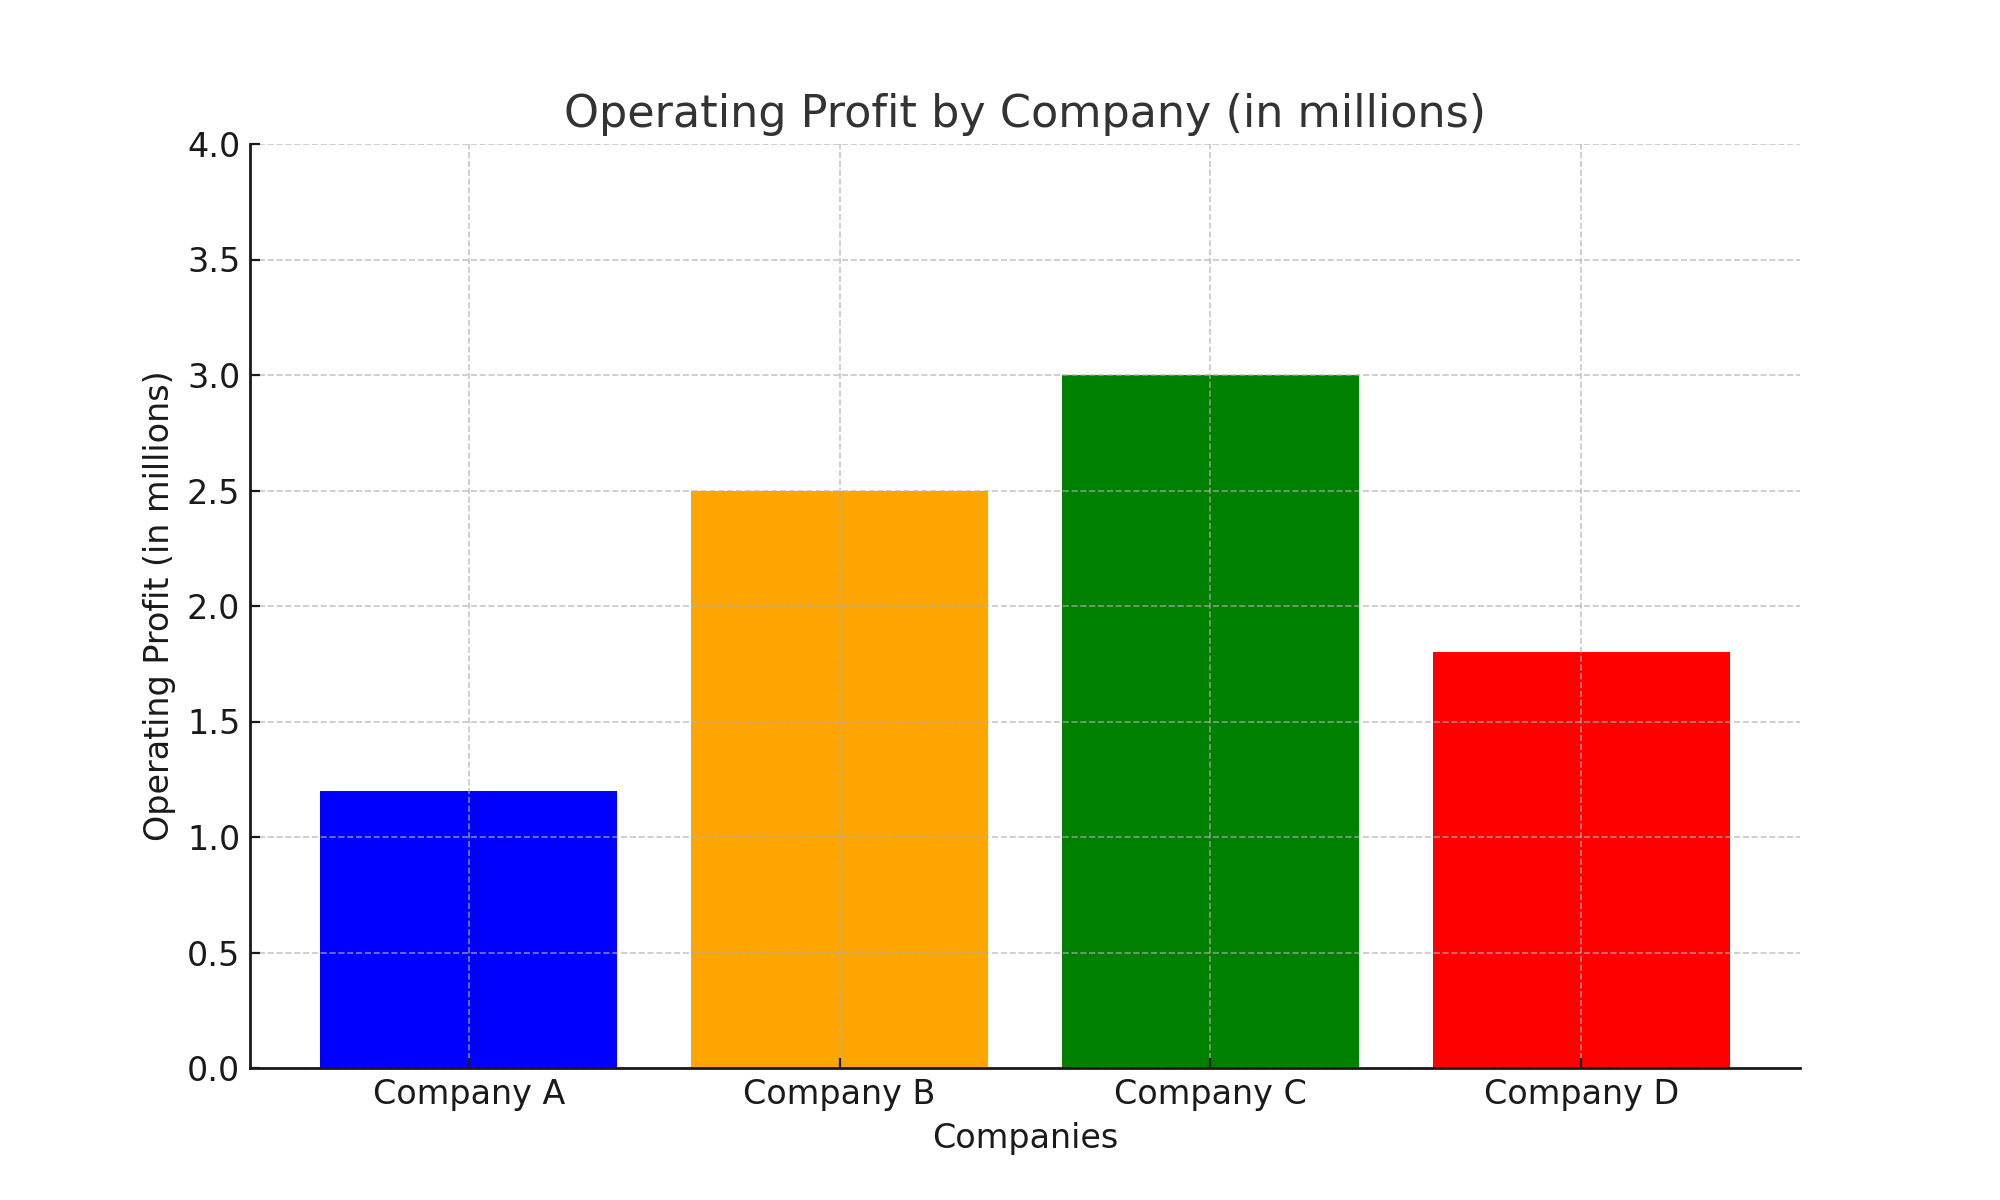

In [18]:
from IPython.display import Image, display


# Generate an image file for the bar chart
for image_content in messages.image_contents:
    print(f"Image File ID: {image_content.image_file.file_id}")
    file_name = f"{image_content.image_file.file_id}_image_file.png"
    project_client.agents.save_file(
        file_id=image_content.image_file.file_id, file_name=file_name)
    print(f"Saved image file to: {Path.cwd() / file_name}")

# Print the file path(s) from the messages
for file_path_annotation in messages.file_path_annotations:
    print(f"File Paths:")
    print(f"Type: {file_path_annotation.type}")
    print(f"Text: {file_path_annotation.text}")
    print(f"File ID: {file_path_annotation.file_path.file_id}")
    print(f"Start Index: {file_path_annotation.start_index}")
    print(f"End Index: {file_path_annotation.end_index}")
    
    saved_file_name = Path(file_path_annotation.text).name
    project_client.agents.save_file(
        file_id=file_path_annotation.file_path.file_id, file_name=saved_file_name)
    display(Image(filename=saved_file_name))
